In [ ]:
!pip install Pillow # used to resize images

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

### Download the starter CSV

In [ ]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [ ]:
colab_root = "/content/"

In [ ]:
csv_path = os.path.join(colab_root, "starter2.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter2.csv",
                     csv_path)

'/content/starter2.csv'

In [ ]:
!head $csv_path -n3

is this man a professional baseball player,yes,COCO_train2014_000000458752.jpg
is the dog waiting,yes,COCO_train2014_000000524291.jpg
is the sky blue,yes,COCO_train2014_000000393221.jpg


In [ ]:
!wc -l $csv_path

20000 /content/starter2.csv


### Download the COCO training images with curl

In [ ]:
# Your code here
# Download the training images with curl, and unzip them.
# If you're working in Colab, be mindful of disk usage.
!curl -L -O 'http://images.cocodataset.org/zips/train2014.zip'
# if interrupted, use !curl -L -O -C - your_url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5G  100 12.5G    0     0  34.2M      0  0:06:16  0:06:16 --:--:-- 35.2M


In [ ]:
!unzip -q '/content/train2014.zip' -d '/content/train2014'

replace /content/train2014/train2014/COCO_train2014_000000270070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Get to know your data.
Write code to display a few images, questions, and answers.

In [ ]:
import csv

coco_images_folder_path = '/content/train2014/train2014/'

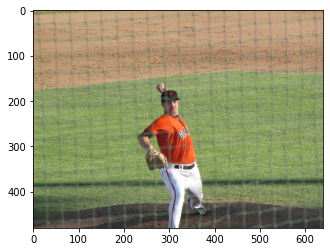

is this man a professional baseball player 
answer: yes


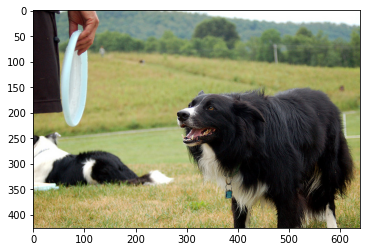

is the dog waiting 
answer: yes


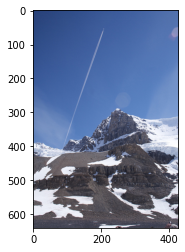

is the sky blue 
answer: yes


In [ ]:
# Your code here
# Next, familiarze yourself with the data. 
# Add code to display a few images from the training set using matplotlib,
# and their corresponding questions and answers from the starter CSV.
# Don't trust that your data is perfect (any bugs are unintentional 
# on my part, but there may well be some). The time you spend poking
# around with it is always a good investment.

with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for i in range(3):
        row = next(reader)
        question, answer, image = row
        img_path = os.path.join(coco_images_folder_path, image)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.show()
        print(question, '\nanswer:', answer)


### As a sanity check, verify you can locate all the images
Write code to verfy you can find every image mentioned in your starter CSV (in the unzipped COCO images).

In [ ]:
with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
        question, answer, image = row
        image = image.strip()
        assert os.path.exists(os.path.join(thumbnail_path, image))

### Resize the images to 299x299
Next, resize the images referenced in your starter CSV to 299x299 using Pillow.

### Tips
Here is code you can use to create a thumbnail of an image.

```
size = 299, 299
im = Image.open(path_to_image)
im.thumbnail(size)
out_file = os.path.join(your_directory, image_name)
im.save(out_file, "JPEG")
```

Note: do not change the image names when saving (your rezied image names should exactly match the names in the starter code).

In [ ]:
# Your code here
# Resize all the images in the starter CSV to 299x299.
# Display a few and make sure the resize is working as expected.
size = 299, 299
thumbnail_path = '/content/thumbnail'
with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
        question, answer, image = row
        img_path = os.path.join(coco_images_folder_path, image)
        im = Image.open(img_path)
        im.thumbnail(size)
        out_file = os.path.join(thumbnail_path, image)
        im.save(out_file, "JPEG")

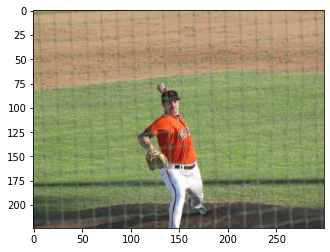

is this man a professional baseball player 
answer: yes


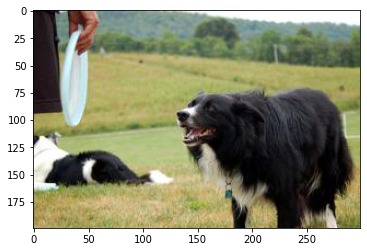

is the dog waiting 
answer: yes


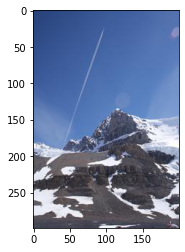

is the sky blue 
answer: yes


In [ ]:
# Your code here
# Delete all images not mentioned in the starter CSV.
# As before (as a sanity check) make sure you can still locate every image 
# (now resized) mentioned in your starter CSV.
# Your code here
# Make sure your image folder contains only the images mentioned in your starter CSV.
with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for i in range(3):
        row = next(reader)
        question, answer, image = row
        img_path = os.path.join(thumbnail_path, image)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.show()
        print(question, '\nanswer:', answer)

### Create a zip of your resized images

### Tips
Here is code you can use to zip a directory, creating a new zip file "thumbnails.zip"

```
shutil.make_archive('thumbnails', 'zip', [directory_to_zip])
```

In [ ]:
# Your code here
# Create a thumbnails.zip
# Verify the size is around 500MB
shutil.make_archive('thumbnails', 'zip', thumbnail_path)

'/content/thumbnails.zip'

In [ ]:
print ('thumbnail zip size',os.stat('thumbnails.zip').st_size/1024/1024, "MB")

thumbnail zip size 255.4650297164917 MB


### Upload your thumbnails.zip to the Cloud

You want to host your thumbnails.zip file at a URL, for example: ```https://storage.googleapis.com/[your_bucket_name]/thumbnails.zip```, so you can easily download it in your second notebook.

You can use any Cloud provider. Google Cloud [storage buckets](https://cloud.google.com/storage/docs/creating-buckets) are fine for this. You can use the [free tier](https://cloud.google.com/free/).

After this is done, you're ready to start on notebook two.

In [ ]:
project_id = 'firm-link-268115'
import uuid
bucket_name = 'coms4995_zl2822'

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
!gsutil cp /content/thumbnails.zip gs://{bucket_name}/

Copying file:///content/thumbnails.zip [Content-Type=application/zip]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

|
Operation completed over 1 objects/255.5 MiB.                                    
